In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
import seaborn as sns
from spacy import displacy

# Util functions

In [31]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Load & preprocess data

In [6]:
with open('data/ontonotes5/ner_train.txt', 'r') as f:
    data = f.read().split('\n\n')

In [24]:
sent = []
for d in data:
    lines = d.split('\n')
#     sent = []
    current_tag = None
    prev_tag = None
    
    for line in lines:
        if line != '':
            token = line.split('\t')
            prev_tag = current_tag
            
            if prev_tag == current_tag and current_tag != 'O':
                sent.append((token[0],'I-'+token[1]))
            elif prev_tag != current_tag and current_tag != 'O':
                sent.append((token[0],'B-'+token[1]))
            else:
                sent.append((token[0],token[1]))
                            
#     sentences.append(sent)

In [27]:
df = pd.DataFrame(sent, columns=['text', 'token'])

In [41]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [42]:
df.head()

,text,token,text_length
0,还有,I-O,2
1,那些,I-O,2
2,鼓噪,I-O,2
3,回汉冲突,I-GPE,4
4,的,I-O,1


# EDA & Vis

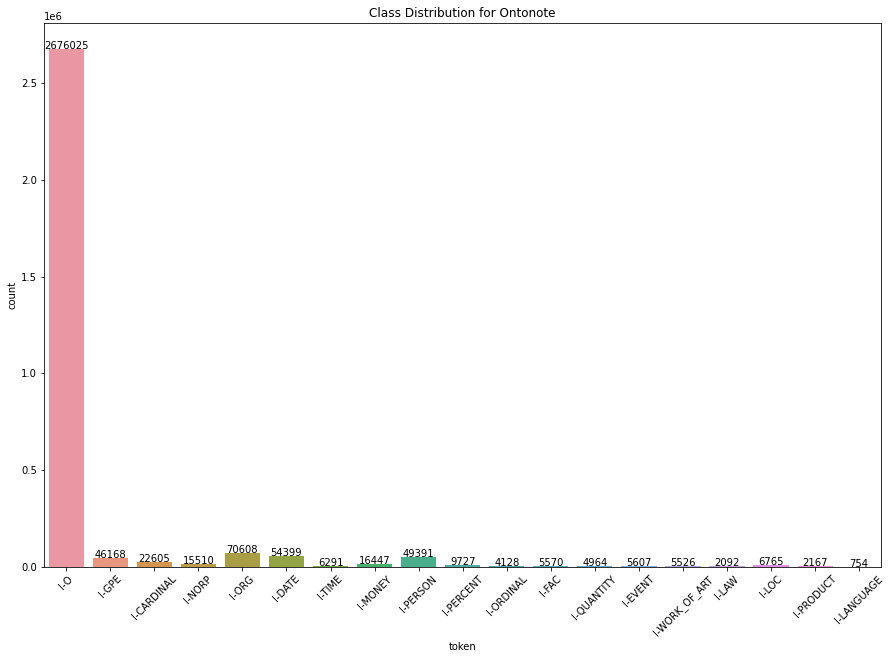

In [34]:
plt.figure(figsize=(15, 10))
plt.title('Class Distribution for Ontonote')
plt.xticks(rotation=45)
bar = sns.countplot(data=df, x='token')
show_values_on_bars(bar)

<AxesSubplot:title={'center':'Text Distribution by token'}, xlabel='token', ylabel='text_length'>

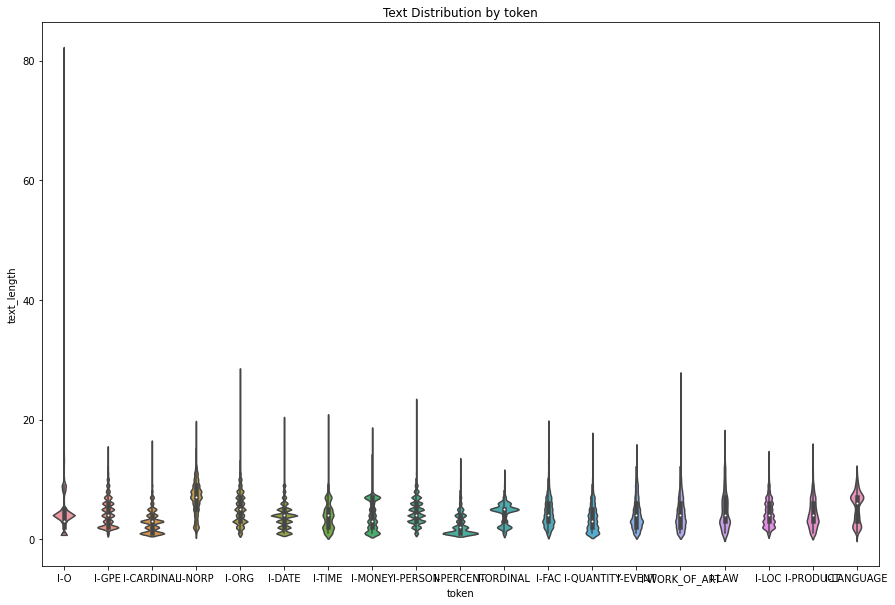

In [43]:
plt.figure(figsize=(15, 10))
plt.title('Text Distribution by token')
sns.violinplot(data=df, y='text_length', x='token')

In [169]:
df.groupby('token').agg(['unique'])

,text,text_length
,unique,unique
token,,
I-CARDINAL,"[两, １２０００, ４０多万, 58, 111, 300, 512, 57, 120, 三...","[1, 5, 4, 2, 3, 9, 6, 7, 8, 12, 13, 11, 10, 15..."
I-DATE,"[今天, the, rest, of, week, Last, year, yesterda...","[2, 3, 4, 9, 6, 5, 1, 7, 8, 13, 11, 10, 12, 19..."
I-EVENT,"[Afghan, war, Iraq, the, World, Series, Olympi...","[6, 3, 4, 5, 8, 7, 2, 1, 9, 12, 10, 13, 11, 15..."
I-FAC,"[澳督府, 政务司大楼, 澳门, 博物馆, Cobb, Parkway, Perimeter...","[3, 5, 2, 4, 7, 9, 6, 8, 10, 1, 11, 13, 12, 19..."
I-GPE,"[回汉冲突, 科威特, Japan, US, New, York, 对, Belgrade,...","[4, 3, 5, 2, 1, 8, 6, 11, 7, 10, 9, 12, 13, 14..."
I-LANGUAGE,"[Taiwanese, Mandarin, English, الفرنسية, 音中文部,...","[9, 8, 7, 4, 10, 3, 6, 2, 5, 1, 11]"
I-LAW,"[RICO, the, United, Nations, Charter, Roe, v.,...","[4, 3, 6, 7, 2, 5, 1, 9, 10, 11, 12, 8, 13, 17..."
I-LOC,"[the, Taiwan, Straits, لقارة, الآسيوية, 查尔斯, +...","[3, 6, 7, 5, 8, 1, 2, 9, 4, 10, 13, 11, 12, 14]"
